# Linear Regression

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [29]:
# ### Step 2: Define the Linear Regression Class
# We'll encapsulate all related functionality within the `LinearRegression` class.

class LinearRegression:
    """
    A class to represent a Linear Regression model.
    """
    
    def __init__(self, learning_rate=0.01, iterations=1000):
        """
        Initialize the Linear Regression model with hyperparameters.

        Parameters:
        - learning_rate (float): Step size for gradient descent.
        - iterations (int): Number of iterations for training.
        """
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None  # Weight (slope) of the regression line
        self.bias = None     # Bias (intercept) of the regression line

    def _initialize_parameters(self):
        """
        Initialize weights and bias to zero.
        """
        self.weights = 0.0
        self.bias = 0.0

    def _compute_gradients(self, X, y, y_pred):
        """
        Compute the gradients for weights and bias.

        Parameters:
        - X (np.ndarray): Input features.
        - y (np.ndarray): True target values.
        - y_pred (np.ndarray): Predicted target values.

        Returns:
        - dw (float): Gradient with respect to the weights.
        - db (float): Gradient with respect to the bias.
        """
        n_samples = X.shape[0]
        dw = -(2 / n_samples) * np.sum(X * (y - y_pred))
        db = -(2 / n_samples) * np.sum(y - y_pred)
        return dw, db

    def _update_parameters(self, dw, db):
        """
        Update weights and bias using the gradients.

        Parameters:
        - dw (float): Gradient with respect to the weights.
        - db (float): Gradient with respect to the bias.
        """
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

    def fit(self, X, y):
        """
        Train the Linear Regression model using gradient descent.

        Parameters:
        - X (np.ndarray): Input features (1D array).
        - y (np.ndarray): True target values (1D array).
        """
        # Initialize parameters
        self._initialize_parameters()
        
        # Gradient descent loop
        for i in range(self.iterations):
            # Compute predictions
            y_pred = self.predict(X)

            # Compute gradients
            dw, db = self._compute_gradients(X, y, y_pred)

            # Update parameters
            self._update_parameters(dw, db)

            # Optional: Print loss every 100 iterations
            if i % 100 == 0:
                loss = self._compute_loss(y, y_pred)
                print(f"Iteration {i}: Loss = {loss:.4f}")

    def _compute_loss(self, y, y_pred):
        """
        Compute the Mean Squared Error (MSE) loss.

        Parameters:
        - y (np.ndarray): True target values.
        - y_pred (np.ndarray): Predicted target values.

        Returns:
        - mse (float): Mean Squared Error loss.
        """
        mse = np.mean((y - y_pred) ** 2)
        return mse

    def predict(self, X):
        """
        Predict target values using the trained model.

        Parameters:
        - X (np.ndarray): Input features (1D array).

        Returns:
        - y_pred (np.ndarray): Predicted target values.
        """
        return self.weights * X + self.bias

    def get_parameters(self):
        """
        Get the current values of weights and bias.

        Returns:
        - (tuple): A tuple containing the weights and bias.
        """
        return self.weights, self.bias


In [22]:
# ### Step 3: Generate Synthetic Data
# We'll create a synthetic dataset to demonstrate the implementation.

np.random.seed(42)  # For reproducibility
X = np.random.rand(100) * 10  # Random X values between 0 and 10
y = 2.5 * X + np.random.randn(100) * 2  # Linear relationship with noise


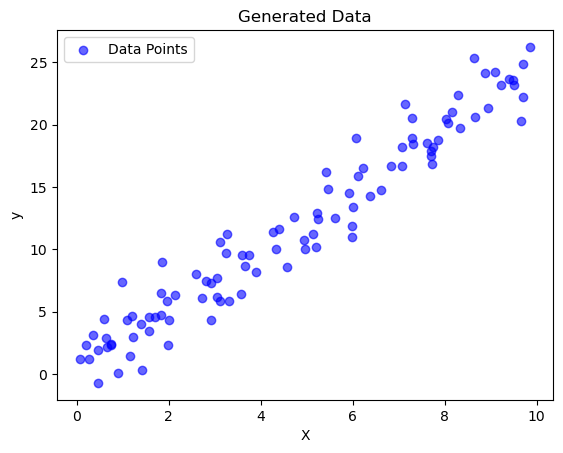

In [23]:
# ### Step 4: Visualize the Data
# Plot the generated data points.

plt.scatter(X, y, color='blue', alpha=0.6, label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data')
plt.legend()
plt.show()

In [32]:
# ### Step 5: Train the Linear Regression Model
# Instantiate and train the model.

model = LinearRegression(learning_rate=0.01, iterations=1000)
model.fit(X, y)

Iteration 0: Loss = 192.1494
Iteration 100: Loss = 3.2267
Iteration 200: Loss = 3.2264
Iteration 300: Loss = 3.2264
Iteration 400: Loss = 3.2263
Iteration 500: Loss = 3.2263
Iteration 600: Loss = 3.2263
Iteration 700: Loss = 3.2263
Iteration 800: Loss = 3.2263
Iteration 900: Loss = 3.2263


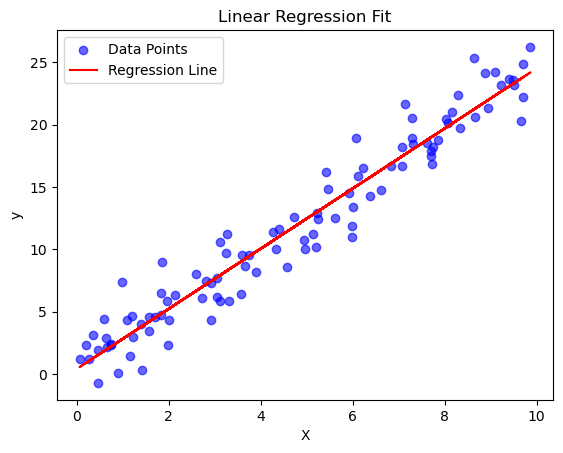

In [33]:
# ### Step 6: Visualize the Results
# Plot the regression line over the data points.

y_pred = model.predict(X)
plt.scatter(X, y, color='blue', alpha=0.6, label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

In [34]:
# ### Step 7: Evaluate the Model
# Evaluate the model by computing the Mean Squared Error (MSE).

mse = model._compute_loss(y, y_pred)
print(f"Mean Squared Error: {mse:.4f}")


Mean Squared Error: 3.2263


In [35]:
# ### Step 8: Retrieve Model Parameters
# Retrieve the trained weights and bias.

weights, bias = model.get_parameters()
print(f"Trained Weights (Slope): {weights:.4f}")
print(f"Trained Bias (Intercept): {bias:.4f}")

Trained Weights (Slope): 2.4081
Trained Bias (Intercept): 0.4300
